# Lack of Robustness of the Markowtix Procedure, and the GMV

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# maximum sharpe ratio portfolio 2 Assets
l = ["Food", "Steel"]
erk.msr(0.1, er[l], cov.loc[l,l])

array([0.75040363, 0.24959637])

In [8]:
# expected return
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [11]:
# probamos con un ER parecido, nos da un portfolio muy diferente
erk.msr(0.1, np.array([.11, .12]), cov.loc[l,l])

array([0.57930354, 0.42069646])

In [12]:
# probamos con un ER un poco mas diferente, invierte todo en un asset 
# Markowitz error maximization
erk.msr(0.1, np.array([.10, .13]), cov.loc[l,l])

array([0., 1.])

In [13]:
# probamos con un ER un poco mas diferente, invierte todo en un asset
# Markowitz error maximization
erk.msr(0.1, np.array([.13, .10]), cov.loc[l,l])

array([1., 0.])

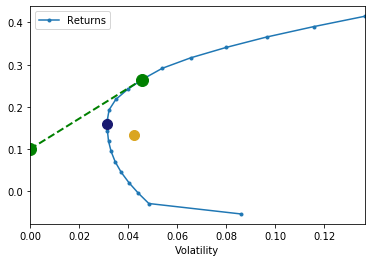

In [22]:
# Anadir EW Portfolio al grafico (amarillo) y Global Minimum vol (blue)
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate = 0.1, show_ew=True, show_gmv=True)